In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_27_T1727_ABALONE_11kV_SiPM2_32V_LED300V.dat Number of events 595690.0
Total events number: 595690
event n. 0 time to process: 0.02
event n. 100000 time to process: 11.06
event n. 200000 time to process: 22.11
event n. 300000 time to process: 33.20
event n. 400000 time to process: 44.21
event n. 500000 time to process: 55.23


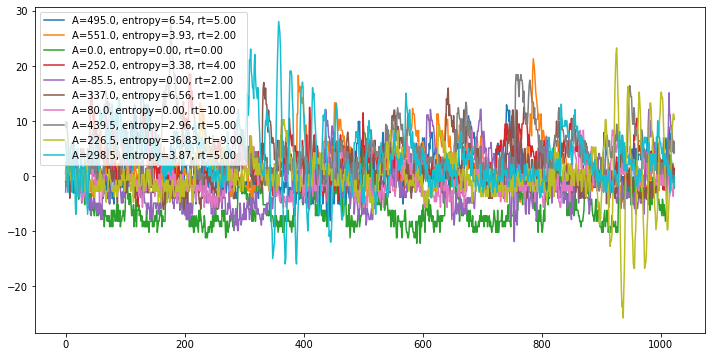

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_27_T1727_ABALONE_11kV_SiPM2_32V_LED300V.dat'
avolt = 11
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='3')

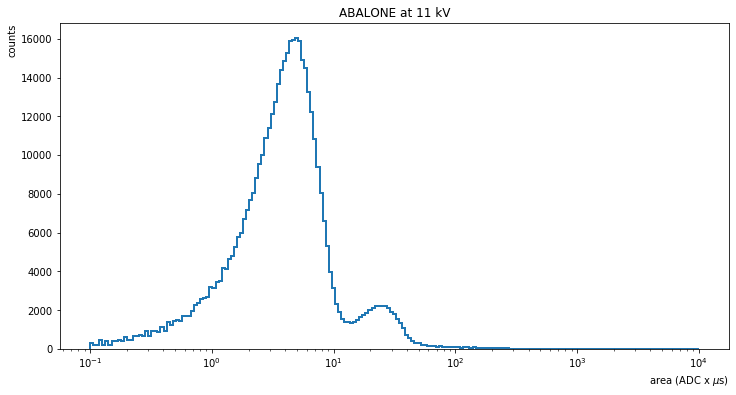

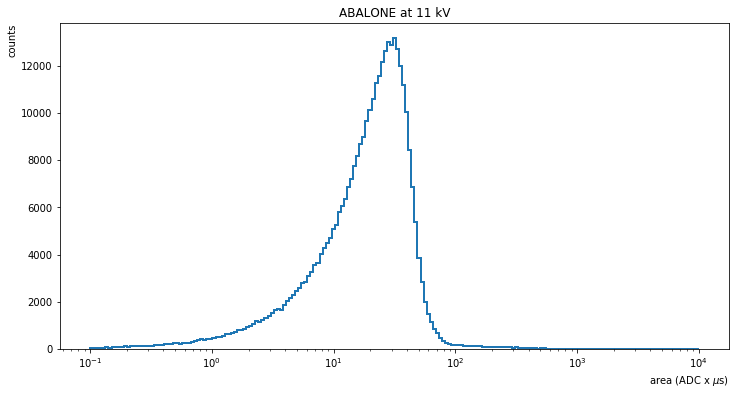

<Figure size 864x432 with 0 Axes>

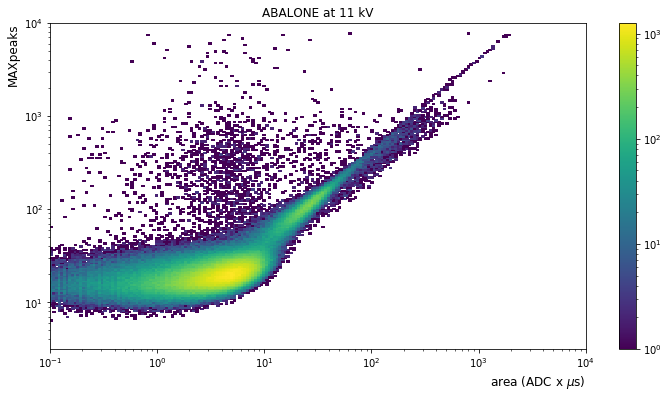

<Figure size 864x432 with 0 Axes>

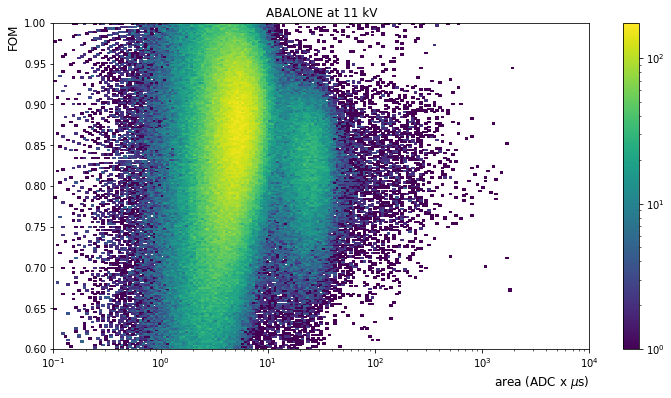

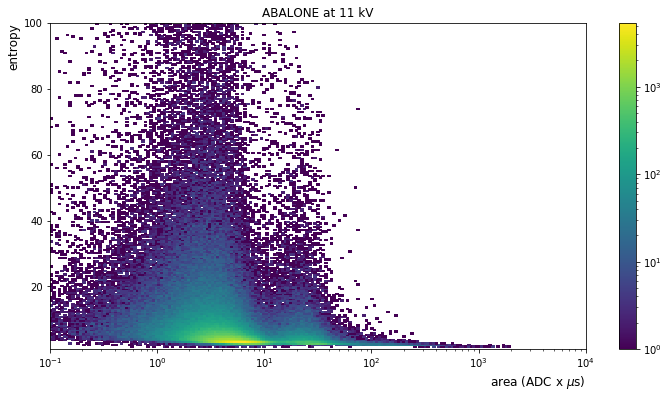

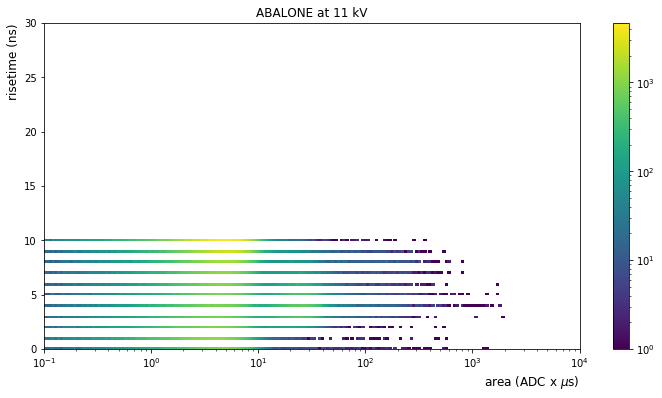

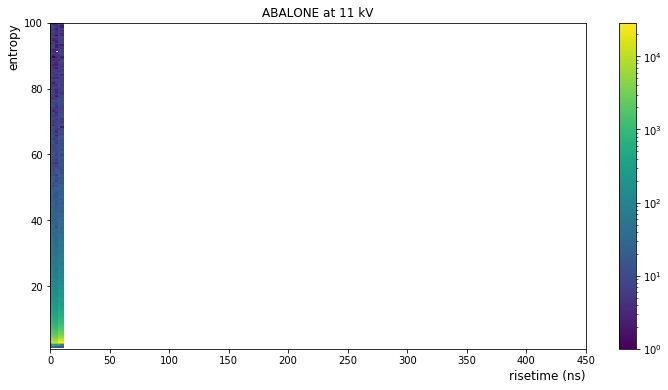

In [3]:
pau.plot_data(data=dataLED,fvolt=avolt,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_27_T1727_ABALONE_11kV_SiPM2_32V_LED300V.dat Number of events 595690.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 111084 waveform samples 1024
Events rejected by areadown 111084 -> 18.647954472964127 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 123 waveform samples 1024
Events rejected by risetime 123 -> 0.020648323792576678 %

n. events 522213 waveform samples 1024
Events rejected by max position 522213 -> 87.6652285584784 %

n. events 52310 waveform samples 1024


/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block2_values] [items->['area_filt', 'width']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


Events selected  52310 -> 8.781413151135657 %


<Figure size 864x432 with 0 Axes>

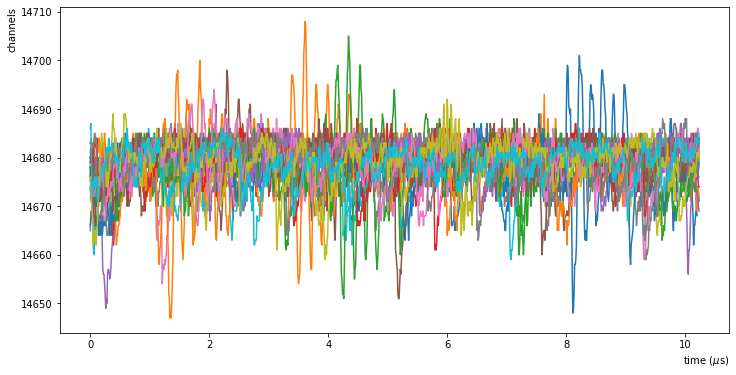

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

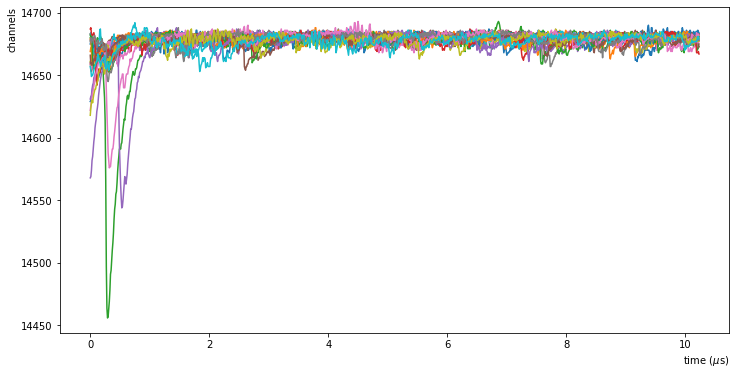

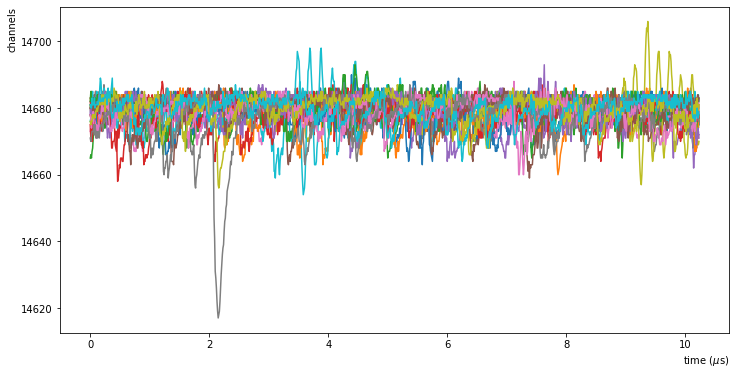

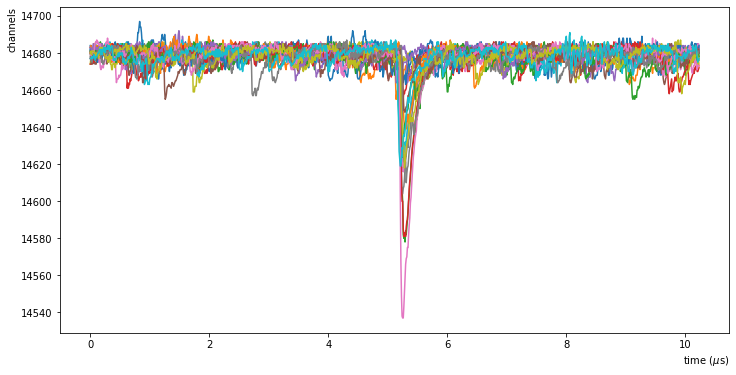

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='3')

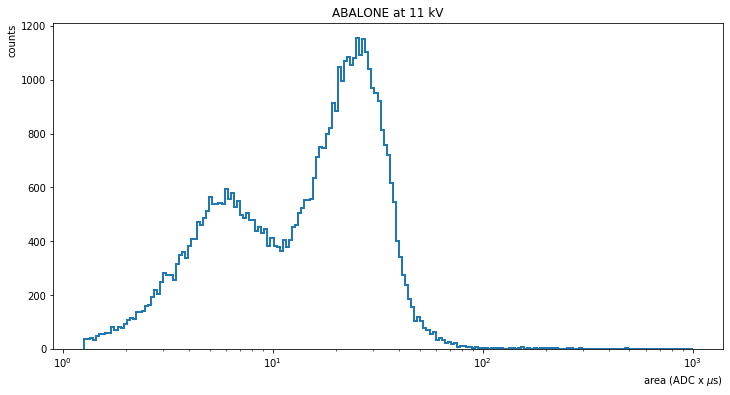

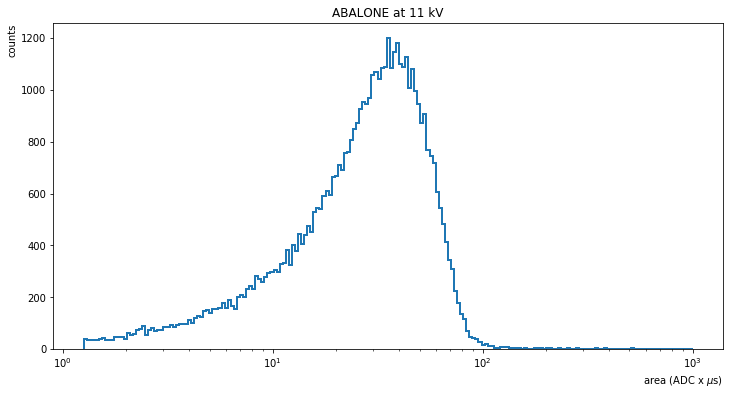

<Figure size 864x432 with 0 Axes>

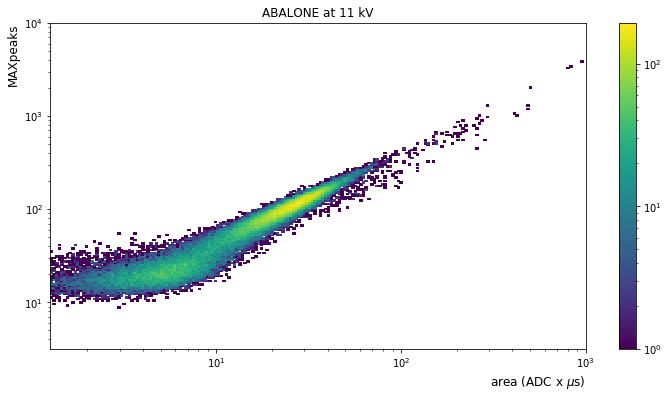

<Figure size 864x432 with 0 Axes>

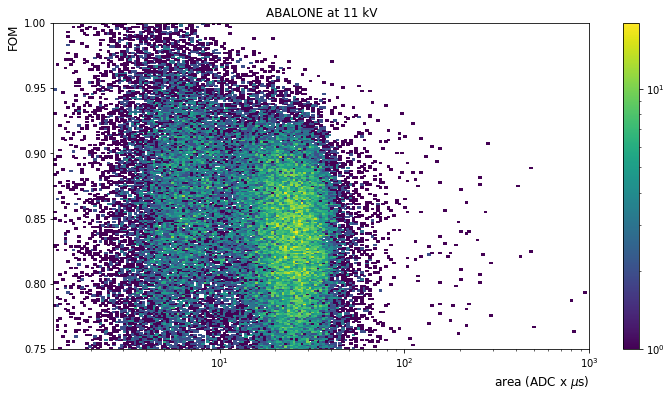

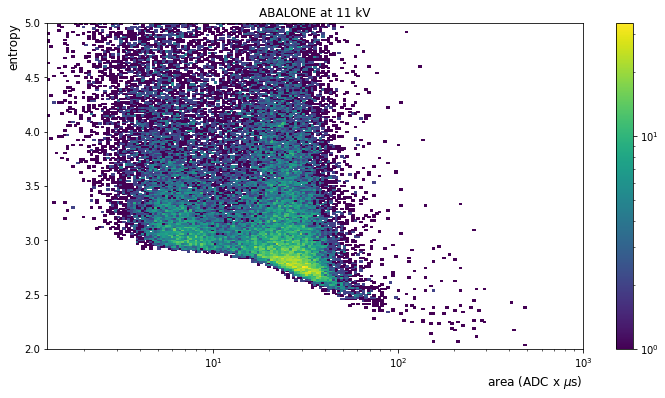

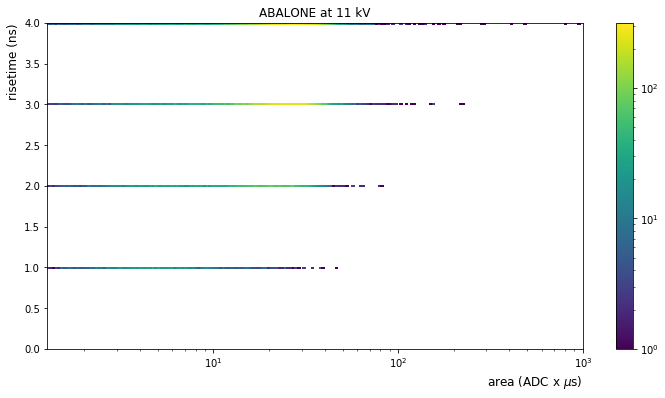

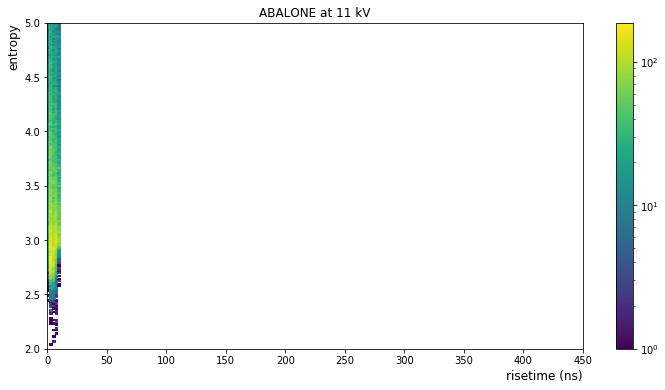

In [5]:
pau.plot_data(data=new_data,fvolt=avolt,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 11750 waveform samples 1024


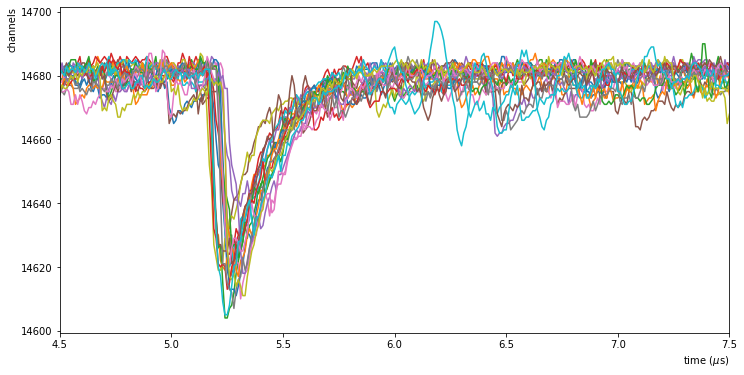

In [6]:
wf2 = new_wf[(new_data['area']>10)&(new_data['area']<20)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

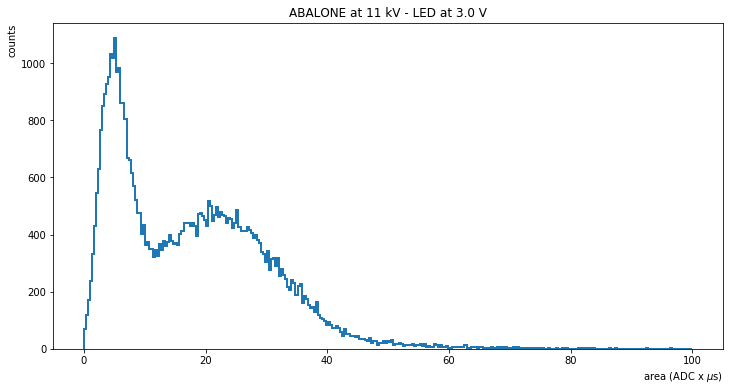

In [7]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=3)

In [ ]:
#peakint = pau.calculate_integrals( new_wf, nn=0, volts=avolt, sipmv = 32, ledv = '4', plot = 0, save = 1 )

In [ ]:
#pau.plot_pe_spectrum(peakint, volts=avolt, low=0, high=100, bins=300, ledv=4)

/data/abalone/ABALONE_RampingUp/2021_08_27_T1738_ABALONE_11kV_SiPM2_32V_LED400V.dat Number of events 595345.0
Total events number: 595345
event n. 0 time to process: 0.00
event n. 100000 time to process: 13.48
event n. 200000 time to process: 26.97
event n. 300000 time to process: 40.51
event n. 400000 time to process: 54.03
event n. 500000 time to process: 67.55


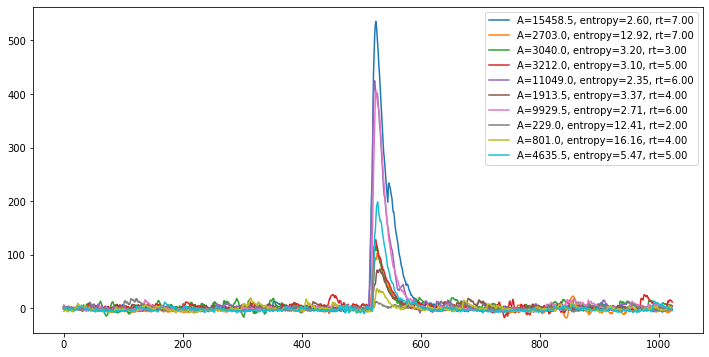

In [8]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_27_T1738_ABALONE_11kV_SiPM2_32V_LED400V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='4')

/data/abalone/ABALONE_RampingUp/2021_08_27_T1738_ABALONE_11kV_SiPM2_32V_LED400V.dat Number of events 595345.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 10288 waveform samples 1024
Events rejected by areadown 10288 -> 1.7280736379746198 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 11 waveform samples 1024
Events rejected by risetime 11 -> 0.00184766815879868 %

n. events 80562 waveform samples 1024
Events rejected by max position 80562 -> 13.531985655376294 %

n. events 466010 waveform samples 1024
Events selected  466010 -> 78.27562169834297 %


<Figure size 864x432 with 0 Axes>

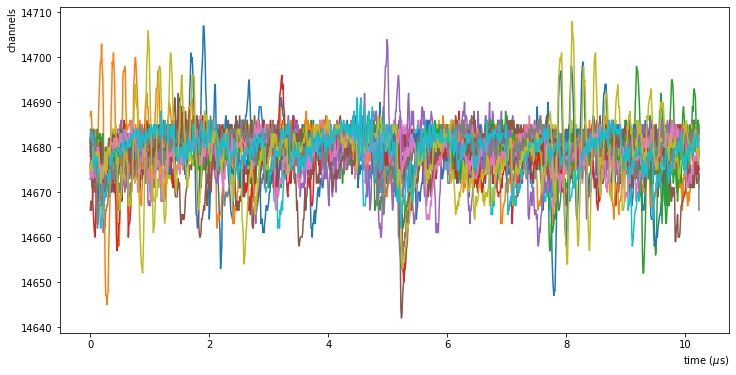

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

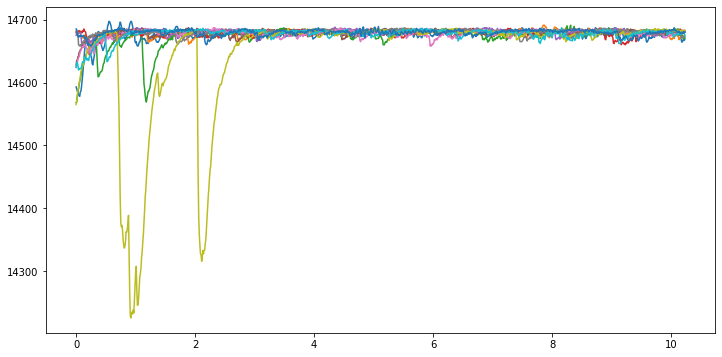

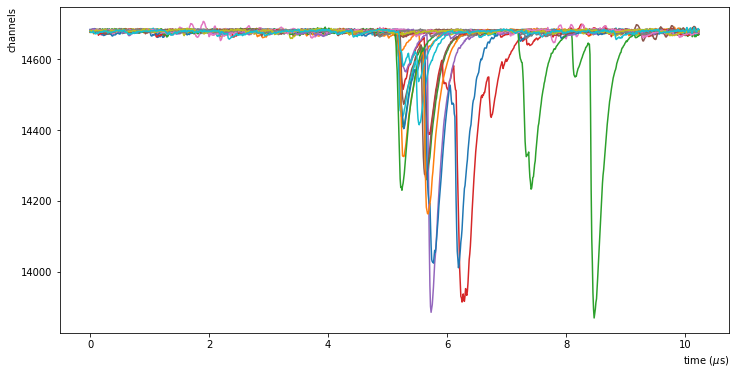

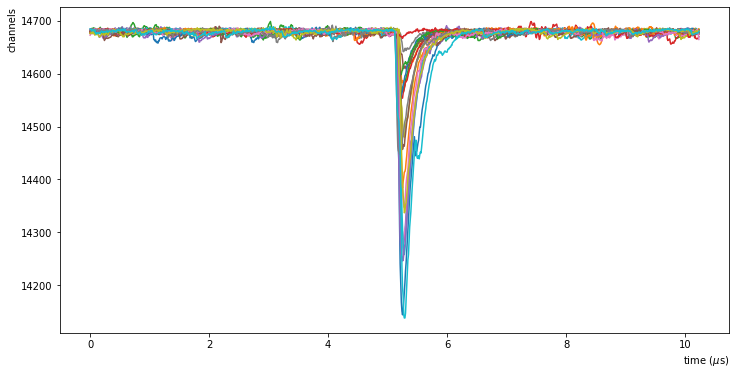

In [9]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='4')

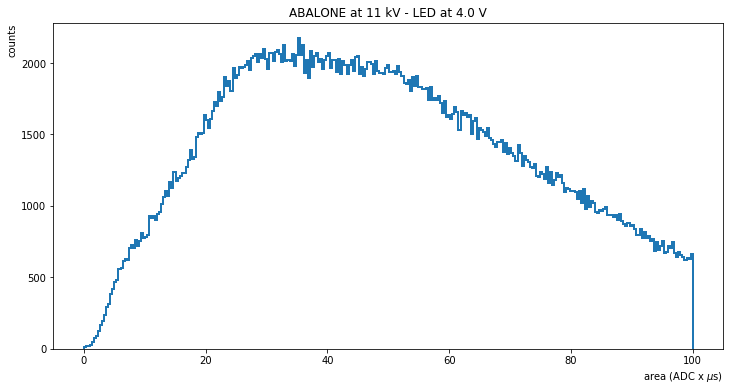

In [10]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=4)